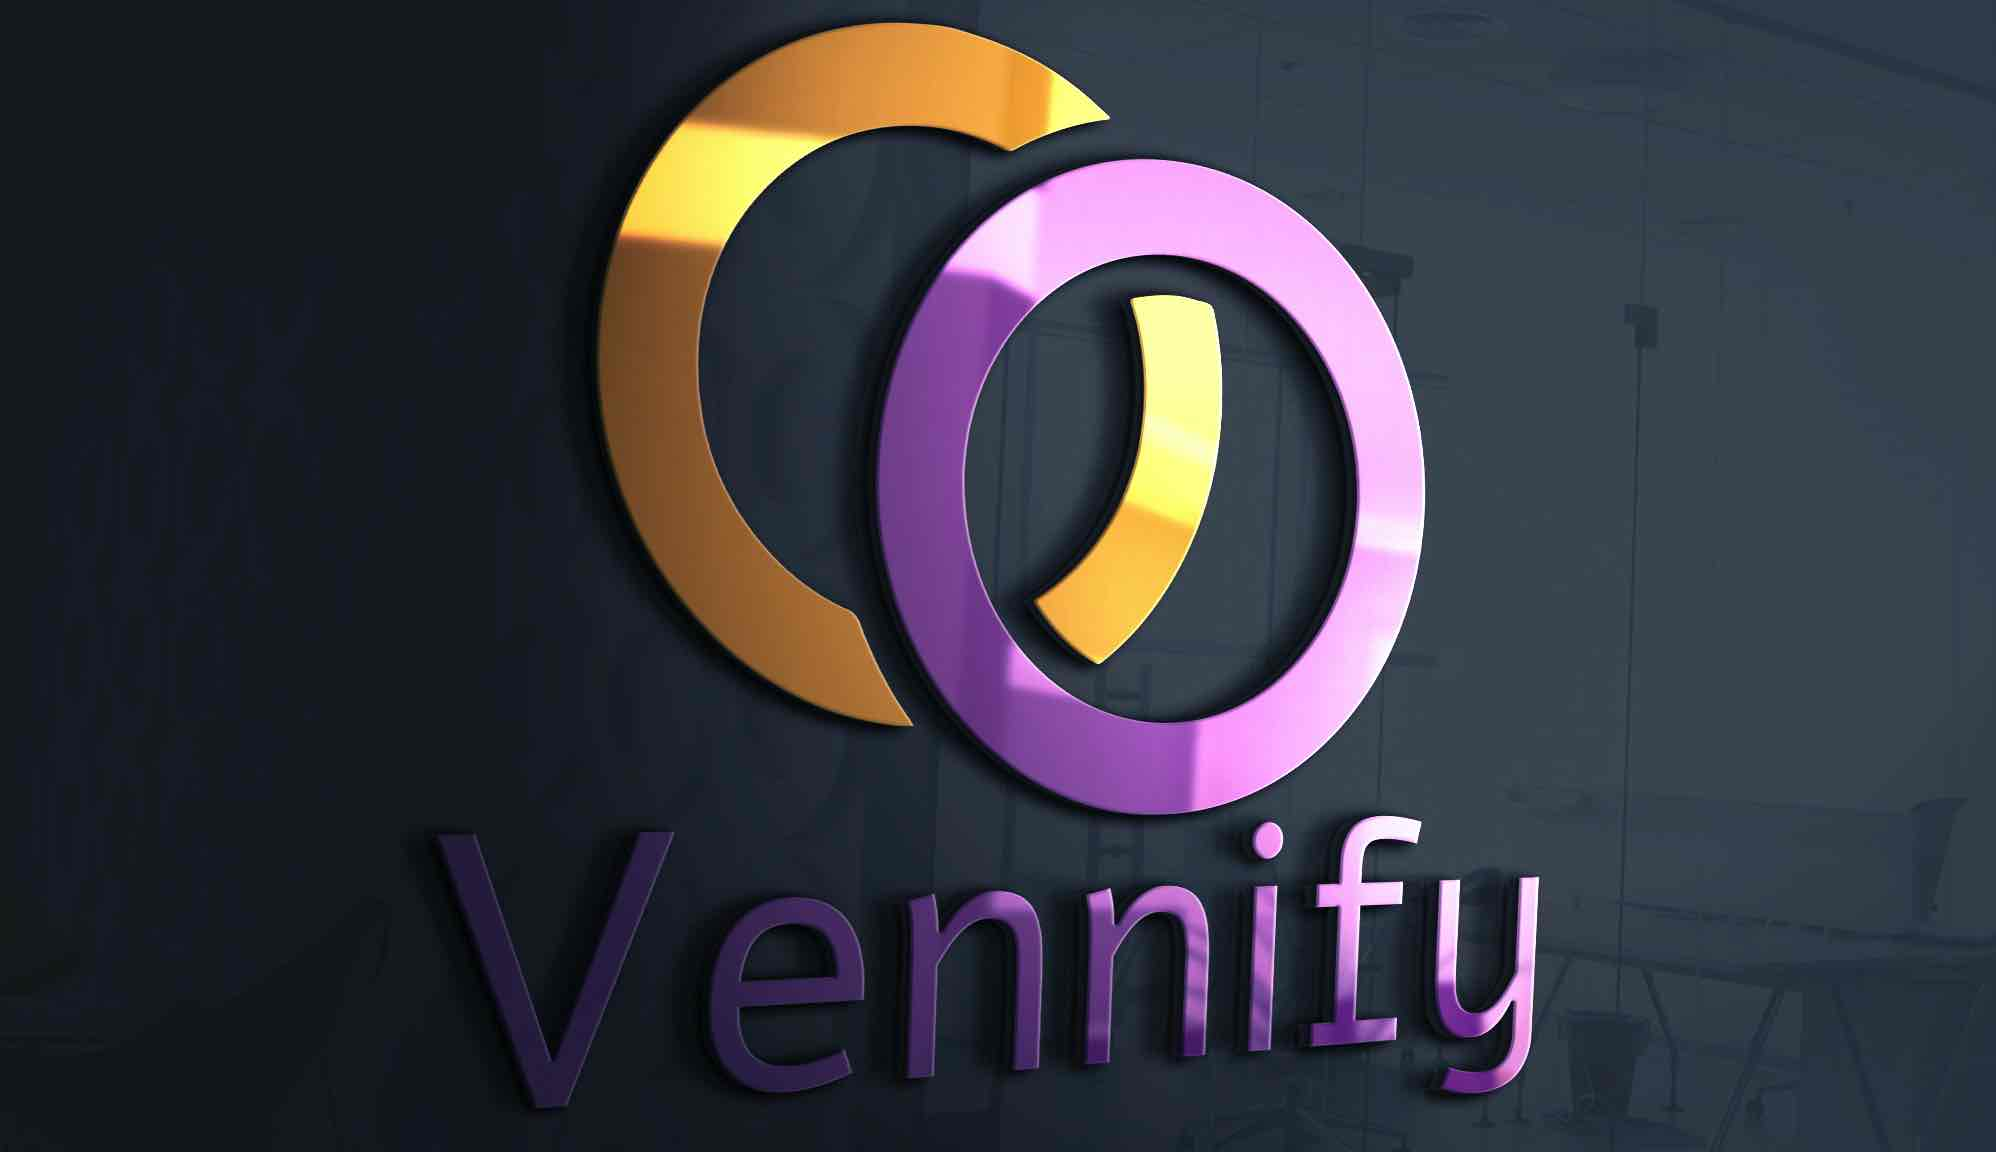

By Eric Fillion @ [Vennify.ai](https://www.vennify.ai/)

## Install

In [1]:
pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.3 MB/s 
     |████████████████████████████████| 365 kB 10.8 MB/s 
     |████████████████████████████████| 4.7 MB 56.3 MB/s 
     |████████████████████████████████| 1.3 MB 49.6 MB/s 
     |████████████████████████████████| 141 kB 53.8 MB/s 
     |████████████████████████████████| 212 kB 53.9 MB/s 
     |████████████████████████████████| 101 kB 4.2 MB/s 
     |████████████████████████████████| 115 kB 52.7 MB/s 
     |████████████████████████████████| 596 kB 56.1 MB/s 
     |████████████████████████████████| 127 kB 67.6 MB/s 
     |████████████████████████████████| 6.6 MB 51.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
 

## Model

In [3]:
from happytransformer import  HappyTextToText

In [4]:
happy_tt = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,
08/08/2022 19:30:28 - INFO - happytransformer.happy_transformer -   Using model: cuda


## Generate

In [5]:
from datasets import load_dataset


In [6]:
train_dataset = load_dataset("jfleg", split='validation[:]') 
eval_dataset = load_dataset("jfleg", split='test[:]')

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/748 [00:00<?, ? examples/s]

Dataset jfleg downloaded and prepared to /root/.cache/huggingface/datasets/jfleg/default/1.0.0/ed4ab2367351fe31949f48849ae6732b164f0d5ea6bb5d4357ff4293ac89511b. Subsequent calls will reuse this data.


In [7]:
for case in train_dataset["corrections"][:2]: 
    print(case)
    print(case[0]) 
    print("--------------------------------------------------")

['So I think we would not be alive if our ancestors did not develop sciences and technologies . ', 'So I think we could not live if older people did not develop science and technologies . ', 'So I think we can not live if old people could not find science and technologies and they did not develop . ', 'So I think we can not live if old people can not find the science and technology that has not been developed . ']
So I think we would not be alive if our ancestors did not develop sciences and technologies . 
--------------------------------------------------
['Not for use with a car . ', 'Do not use in the car . ', 'Car not for use . ', 'Can not use the car . ']
Not for use with a car . 
--------------------------------------------------


In [8]:
import csv

def generate_csv(csv_path, dataset):
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for case in dataset:
     	    # Adding the task's prefix to input 
            input_text = "grammar: " + case["sentence"]
            for correction in case["corrections"]:
                # a few of the cases contain blank strings. 
                if input_text and correction:
                    writter.writerow([input_text, correction])
                    


generate_csv("train.csv", train_dataset)
generate_csv("eval.csv", eval_dataset)

In [9]:
before_result = happy_tt.eval("eval.csv")

08/08/2022 19:32:18 - INFO - happytransformer.happy_transformer -   Preprocessing evaluating data...


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-442b1661ee518db7/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

***** Running Evaluation *****
  Num examples = 2988
  Batch size = 1


In [10]:
print("Before loss:", before_result.loss)

Before loss: 1.2803919315338135


# Training

In [11]:
from happytransformer import TTTrainArgs 
args = TTTrainArgs(batch_size=8) 
happy_tt.train("train.csv", args=args)

08/08/2022 19:34:19 - INFO - happytransformer.happy_transformer -   Preprocessing training data...


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-399a3bbf9719a20e/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

08/08/2022 19:34:23 - INFO - happytransformer.happy_transformer -   Training...
PyTorch: setting up devices
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3016
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1131


Step,Training Loss
500,0.577400
1000,0.441900




Training completed. Do not forget to share your model on huggingface.co/models =)




# Evaluating

In [12]:
before_loss = happy_tt.eval("eval.csv") 
print("After loss: ", before_loss.loss)

08/08/2022 19:40:04 - INFO - happytransformer.happy_transformer -   Preprocessing evaluating data...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

PyTorch: setting up devices
***** Running Evaluation *****
  Num examples = 2988
  Batch size = 1


After loss:  0.44996318221092224


In [13]:
from happytransformer import TTSettings
beam_settings = TTSettings(num_beams=5, min_length=1, max_length=20)

In [16]:
example_1 = "grammar: This sentences, has bads grammar ad spellin!" 
result_1 = happy_tt.generate_text(example_1, args=beam_settings) 
print(result_1.text)

This sentence has bad grammar and spelling!


In [18]:
example_1 = "grammar: sorry i has a bad day!" 
result_1 = happy_tt.generate_text(example_1, args=beam_settings) 
print(result_1.text)

Sorry i have a bad day!


In [19]:
example_1 = "grammar: they is very cool!" 
result_1 = happy_tt.generate_text(example_1, args=beam_settings) 
print(result_1.text)

They are very cool!


In [22]:
example_1 = "grammar: thank to who transformer!" 
result_1 = happy_tt.generate_text(example_1, args=beam_settings) 
print(result_1.text)

Thank you to who is the transformer!
